In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from NBAData.features import *

### *basic outline:* team/player data -> assign rest days -> assign_postion (encode it) -> assign if starter (encode it) -> opp/team encode it -> prop features -> player prop matchup data

In [10]:
pd.set_option('display.max_columns', None)
s21 = pd.read_csv('PLAYOFF_DATA/PLAYOFFS_21_FEATURES.csv')
s21 = calculate_days_of_rest(s21)
s22 = pd.read_csv('PLAYOFF_DATA/PLAYOFFS_22_FEATURES.csv')
s22 = calculate_days_of_rest(s22)
s23 = pd.read_csv('PLAYOFF_DATA/PLAYOFFS_23_FEATURES.csv')
s23 = calculate_days_of_rest(s23)
s24 = pd.read_csv('PLAYOFF_DATA/PLAYOFFS_24_FEATURES.csv')
s24 = calculate_days_of_rest(s24)
s25 = pd.read_csv('PLAYOFF_DATA/PLAYOFFS_25_FEATURES.csv')
s25 = calculate_days_of_rest(s25)

all_playoff_data = pd.concat([s21, s22, s23, s24, s25])
all_playoff_data['OPP_TEAM_ID'] = all_playoff_data['OPP_TEAM_ID'].astype(int)
all_playoff_data.drop(columns = ['Unnamed: 0'], inplace=True)
print(f"Data has {all_playoff_data.shape[0]} rows and {all_playoff_data.shape[1]} columns")
all_playoff_data.tail()


Data has 8882 rows and 94 columns


,PLAYER_NAME,PLAYER_ID,MATCHUP,TEAM_ABBREVIATION,TEAM_ID,OPP_ABBREVIATION,HOME_GAME,GAME_ID,GAME_DATE,WL,MIN,PTS,AST,REB,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,STL,BLK,TOV,PF,PLUS_MINUS,FANTASY_PTS,PointsPerShot,eFG,START_POSITION,OFF_RATING,DEF_RATING,NET_RATING,OREB_PCT,DREB_PCT,REB_PCT,AST_PCT,AST_TOV,USG_PCT,TS_PCT,E_PACE,PACE,PIE,PACE_PER40,TEAM_GAME_DATE,TEAM_MIN,TEAM_FGM,TEAM_FGA,TEAM_FG_PCT,TEAM_FG3M,TEAM_FG3A,TEAM_FG3_PCT,TEAM_FTM,TEAM_FTA,TEAM_FT_PCT,TEAM_OREB,TEAM_DREB,TEAM_REB,TEAM_AST,TEAM_STL,TEAM_BLK,TEAM_TOV,TEAM_PF,TEAM_PTS,OPP_DEF_RATING,OPP_STL,OPP_BLK,OPP_REB,OPP_FG_PCT,OPP_TEAM_ID,TEAM_OFF_RATING,TEAM_PACE,GAME_PACE,OPP_PACE,STARTING,USG_PCT_LAST_3,USG_PCT_LAST_5,USG_PCT_LAST_7,PTS_LAST_3,PTS_LAST_5,PTS_LAST_7,STD_PTS_LAST_3,STD_PTS_LAST_5,STD_PTS_LAST_7,PLAYER_HOME_AVG_PTS,PLAYER_AWAY_AVG_PTS,GUARD,FORWARD,CENTER,DAYS_OF_REST
1708,Quinten Post,1642366,GSW @ MIN,GSW,1610612744,MIN,0,42400231,2025-05-06,W,6,0,0,1,0,0,NaN,0,0,NaN,0,0,NaN,0,1,0,0,0,0,14,1.2,0.00,0.00,NaN,138.5,28.6,109.9,0.0,0.111,0.071,0.0,0.0,0.000,0.000,101.41,102.32,0.056,85.26,"MAY 06, 2025",240,34,87,0.391,18,42,0.429,13,15,0.867,18,33,51,26,10,2,12,18,99,113.013699,7.0,6.0,41.0,0.395349,1610612750,113.013699,87.60,92.54,97.48,0,0.05,0.14,0.14,1.67,4.6,5.29,2.89,5.32,5.35,NaN,3.40,0,0,1,2.0
1709,Quinten Post,1642366,GSW @ MIN,GSW,1610612744,MIN,0,42400232,2025-05-08,L,3,0,0,0,0,0,NaN,0,0,NaN,0,0,NaN,0,0,0,0,0,0,-13,0.0,0.00,0.00,C,0.0,216.7,-216.7,0.0,0.000,0.000,0.0,0.0,0.000,0.000,90.47,80.00,0.000,66.67,"MAY 08, 2025",240,34,76,0.447,9,32,0.281,16,25,0.640,10,32,42,23,8,2,17,16,93,98.936170,10.0,5.0,39.0,0.505747,1610612750,98.936170,94.00,95.40,96.80,1,0.00,0.08,0.12,0.00,2.0,3.57,0.00,2.74,4.72,NaN,2.83,0,0,1,2.0
1710,Quinten Post,1642366,GSW vs. MIN,GSW,1610612744,MIN,1,42400233,2025-05-10,L,3,0,0,0,0,0,NaN,0,0,NaN,0,0,NaN,0,0,0,0,0,1,-6,0.0,0.00,0.00,NaN,40.0,160.0,-120.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,94.22,95.36,-0.143,79.47,"MAY 10, 2025",240,35,81,0.432,10,23,0.435,17,21,0.810,12,24,36,21,6,7,14,24,97,105.160451,4.0,7.0,44.0,0.439024,1610612750,105.160451,92.24,94.24,96.24,0,0.00,0.03,0.10,0.00,1.0,3.29,0.00,2.24,4.89,5.0,NaN,0,0,1,2.0
1711,Quinten Post,1642366,GSW vs. MIN,GSW,1610612744,MIN,1,42400234,2025-05-12,L,5,5,1,2,2,4,0.50,1,2,0.50,0,0,NaN,1,1,0,0,0,1,14,8.9,1.25,1.25,NaN,146.2,38.5,107.7,0.2,0.250,0.222,0.2,0.0,0.286,0.625,132.19,134.68,0.257,112.23,"MAY 12, 2025",240,37,85,0.435,8,27,0.296,28,33,0.848,14,24,38,18,10,1,15,25,110,109.430959,9.0,5.0,38.0,0.493671,1610612750,109.430959,100.52,101.98,103.44,0,0.10,0.06,0.10,1.67,1.0,2.14,2.89,2.24,2.67,5.0,NaN,0,0,1,2.0
1712,Quinten Post,1642366,GSW @ MIN,GSW,1610612744,MIN,0,42400235,2025-05-14,L,10,3,0,3,1,4,0.25,1,4,0.25,0,0,NaN,0,3,0,0,2,1,9,4.6,0.75,0.75,NaN,127.3,86.4,40.9,0.0,0.333,0.158,0.0,0.0,0.231,0.375,100.25,106.24,0.000,88.53,"MAY 14, 2025",240,39,90,0.433,11,39,0.282,21,30,0.700,18,22,40,21,14,1,17,21,110,107.632094,11.0,4.0,39.0,0.628205,1610612750,107.632094,102.20,100.40,98.60,0,0.17,0.10,0.10,2.67,1.6,1.86,2.52,2.30,2.41,NaN,2.86,0,0,1,2.0


In [11]:
list(all_playoff_data.columns)

['PLAYER_NAME',
 'PLAYER_ID',
 'MATCHUP',
 'TEAM_ABBREVIATION',
 'TEAM_ID',
 'OPP_ABBREVIATION',
 'HOME_GAME',
 'GAME_ID',
 'GAME_DATE',
 'WL',
 'MIN',
 'PTS',
 'AST',
 'REB',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PLUS_MINUS',
 'FANTASY_PTS',
 'PointsPerShot',
 'eFG',
 'START_POSITION',
 'OFF_RATING',
 'DEF_RATING',
 'NET_RATING',
 'OREB_PCT',
 'DREB_PCT',
 'REB_PCT',
 'AST_PCT',
 'AST_TOV',
 'USG_PCT',
 'TS_PCT',
 'E_PACE',
 'PACE',
 'PIE',
 'PACE_PER40',
 'TEAM_GAME_DATE',
 'TEAM_MIN',
 'TEAM_FGM',
 'TEAM_FGA',
 'TEAM_FG_PCT',
 'TEAM_FG3M',
 'TEAM_FG3A',
 'TEAM_FG3_PCT',
 'TEAM_FTM',
 'TEAM_FTA',
 'TEAM_FT_PCT',
 'TEAM_OREB',
 'TEAM_DREB',
 'TEAM_REB',
 'TEAM_AST',
 'TEAM_STL',
 'TEAM_BLK',
 'TEAM_TOV',
 'TEAM_PF',
 'TEAM_PTS',
 'OPP_DEF_RATING',
 'OPP_STL',
 'OPP_BLK',
 'OPP_REB',
 'OPP_FG_PCT',
 'OPP_TEAM_ID',
 'TEAM_OFF_RATING',
 'TEAM_PACE',
 'GAME_PACE',
 'OPP_PACE',
 'STARTING',
 'U

In [12]:
all_playoff_data.groupby('PLAYER_NAME')['PTS'].sum().sort_values(ascending=False).head(10)

PLAYER_NAME
Jayson Tatum             2011
Nikola Jokić             1764
Jaylen Brown             1704
Jalen Brunson            1701
Luka Dončić              1511
Jimmy Butler III         1327
Devin Booker             1315
Giannis Antetokounmpo    1249
Stephen Curry            1179
Donovan Mitchell         1154
Name: PTS, dtype: int64

### Prepare data for training

In [53]:
features = [
    'MIN','FGA', 'FTA', 'FG3A','FG_PCT', 'FT_PCT', 'FG3_PCT', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
    'OFF_RATING', 'DEF_RATING', 'NET_RATING',
    'AST_PCT', 'AST_TOV','USG_PCT', 'TS_PCT','PACE',
    'TEAM_FGA', 'TEAM_FG3A','TEAM_FTA',
    'TEAM_AST', 'TEAM_REB', 'TEAM_STL', 'TEAM_BLK', 'TEAM_TOV', 'TEAM_PF',
    'TEAM_OFF_RATING', 'TEAM_PACE', 
    #grab oppenents avgerages for the game
    'OPP_PACE', 'OPP_DEF_RATING',
    'OPP_STL', 'OPP_BLK', 'OPP_REB', 'OPP_FG_PCT',
    #rolling averages
    'USG_PCT_LAST_3', 'USG_PCT_LAST_5', 'USG_PCT_LAST_7',
    'PTS_LAST_3', 'PTS_LAST_5', 'PTS_LAST_7',
    'STD_PTS_LAST_3', 'STD_PTS_LAST_5', 'STD_PTS_LAST_7',
    'PLAYER_HOME_AVG_PTS', 'PLAYER_AWAY_AVG_PTS',
    #ill input these during prediction
    'GUARD', 'FORWARD', 'CENTER', 'HOME_GAME', 'STARTING', 'DAYS_OF_REST'
]

In [34]:
corr_matrix = all_playoff_data.corr(numeric_only=True)
target = corr_matrix['PTS'].sort_values(ascending=False).head(15)
target


PTS                    1.000000
FGM                    0.973323
FGA                    0.914761
FANTASY_PTS            0.912386
PLAYER_HOME_AVG_PTS    0.900772
PTS_LAST_3             0.898761
PLAYER_AWAY_AVG_PTS    0.895325
PTS_LAST_5             0.880346
PTS_LAST_7             0.873409
MIN                    0.771308
FTM                    0.705325
FTA                    0.701566
FG3M                   0.671890
FG3A                   0.670843
STARTING               0.593982
Name: PTS, dtype: float64

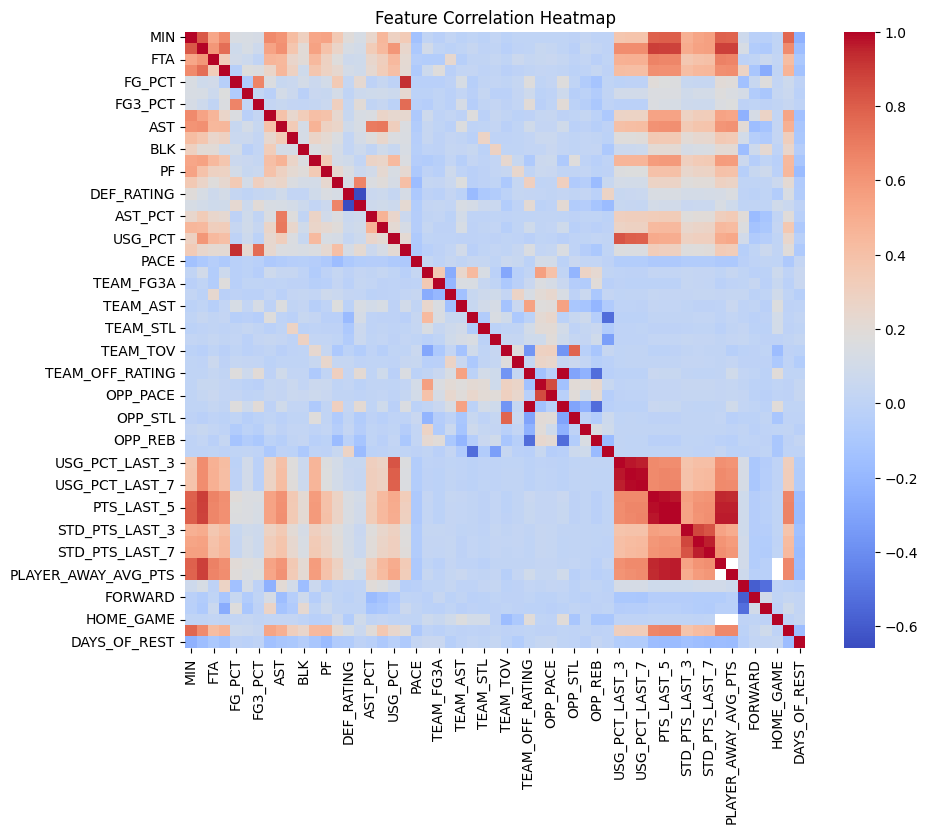

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(all_playoff_data[features].corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

### Train XGBoost model

In [36]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X = all_playoff_data[features]
y = all_playoff_data['PTS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model
XGB_model = xgb.XGBRegressor()
XGB_model.fit(X_train, y_train)
pred = XGB_model.predict(X_test)

print(f"R-squared: {round(r2_score(y_test, pred), 3)}")
print(f"Mean Absolute Error: {round(mean_absolute_error(y_test, pred), 3)}")
print(f"Mean Squared Error: {round(mean_squared_error(y_test, pred), 3)}")



R-squared: 0.996
Mean Absolute Error: 0.315
Mean Squared Error: 0.389


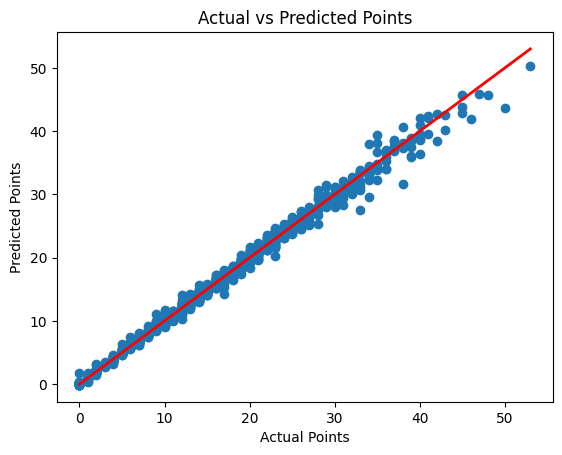

In [37]:
plt.scatter(y_test, pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs Predicted Points')
plt.show()

In [44]:
avg_features = [
    'PLAYER_NAME', 'OPP_ABBREVIATION', 'GAME_DATE',
    'MIN','FGA', 'FTA', 'FG3A', 'FG_PCT', 'FT_PCT', 'FG3_PCT', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
    'OFF_RATING', 'DEF_RATING', 'NET_RATING',
    'AST_PCT', 'AST_TOV','USG_PCT', 'TS_PCT','PACE',
    'TEAM_FGA', 'TEAM_FG3A','TEAM_FTA',
    'TEAM_AST', 'TEAM_REB', 'TEAM_STL', 'TEAM_BLK', 'TEAM_TOV', 'TEAM_PF',
    'TEAM_OFF_RATING', 'TEAM_PACE',
    'OPP_PACE', 'OPP_DEF_RATING',
    'OPP_STL', 'OPP_BLK', 'OPP_REB', 'OPP_FG_PCT',
    'USG_PCT_LAST_3', 'USG_PCT_LAST_5', 'USG_PCT_LAST_7',
    'PTS_LAST_3', 'PTS_LAST_5', 'PTS_LAST_7',
    'STD_PTS_LAST_3', 'STD_PTS_LAST_5', 'STD_PTS_LAST_7',
    'PLAYER_HOME_AVG_PTS', 'PLAYER_AWAY_AVG_PTS',
    'GUARD', 'FORWARD', 'CENTER','HOME_GAME', 'STARTING', 'DAYS_OF_REST'
]


In [91]:
import requests
from datetime import datetime
import pytz

today = datetime.today().strftime('%Y%m%d')

def get_espn_games(date_str='20250613'):  # YYYYMMDD format
    url = f"http://site.api.espn.com/apis/site/v2/sports/basketball/nba/scoreboard?dates={date_str}"
    response = requests.get(url)
    data = response.json()
    
    # Define timezone objects
    utc = pytz.UTC
    pst = pytz.timezone('America/Los_Angeles')

    games_list = []
    for event in data['events']:
        # Parse UTC time from ESPN
        utc_time = datetime.strptime(event['date'], '%Y-%m-%dT%H:%MZ').replace(tzinfo=utc)
        # Convert to PST
        pst_time = utc_time.astimezone(pst)
        
        game_dict = {
            'game_date': pst_time.strftime('%Y-%m-%d'),
            'home_team': event['competitions'][0]['competitors'][0]['team']['abbreviation'],
            'away_team': event['competitions'][0]['competitors'][1]['team']['abbreviation'],
            'game_time': pst_time.strftime('%I:%M %p'),  # 12-hour format with AM/PM
            'venue': event['competitions'][0]['venue']['fullName']
        }
        games_list.append(game_dict)
    
    return games_list
def getPlayerAVG(player, data):
    player_data = data[data['PLAYER_NAME'] == player]
    res = []
    exclude = ['PLAYER_NAME','OPP_ABBREVIATION','GAME_DATE','OPP_PACE','OPP_DEF_RATING','OPP_STL','OPP_BLK','OPP_REB','OPP_FG_PCT','HOME_GAME','STARTING',
    'USG_PCT_LAST_3','USG_PCT_LAST_5','USG_PCT_LAST_7','PTS_LAST_3','PTS_LAST_5','PTS_LAST_7','STD_PTS_LAST_3','STD_PTS_LAST_5','STD_PTS_LAST_7','PLAYER_HOME_AVG_PTS','PLAYER_AWAY_AVG_PTS','GUARD','FORWARD','CENTER',
    'DAYS_OF_REST'
]
    for col in player_data[avg_features].columns:
        if col not in exclude:
            res.append(round(player_data[col].mean(), 2))
    return res

def getOppAVG(team, data):
    team_data = data[data['OPP_ABBREVIATION'] == team]
    
    include = ['OPP_DEF_RATING', 'OPP_STL',	'OPP_BLK','OPP_REB','OPP_FG_PCT','OPP_PACE']
    
    team_stats = team_data.groupby('GAME_DATE')[include].mean().reset_index()
    return [round(team_stats[col].mean(), 2) for col in include]

def getPlayerRollingAVG(player, data):
    player = data[data['PLAYER_NAME'] == player].copy()
    player.sort_values(by='GAME_DATE', inplace=True)
    res = []
    include = ['USG_PCT_LAST_3','USG_PCT_LAST_5','USG_PCT_LAST_7','PTS_LAST_3','PTS_LAST_5','PTS_LAST_7',
               'STD_PTS_LAST_3','STD_PTS_LAST_5','STD_PTS_LAST_7','PLAYER_HOME_AVG_PTS','PLAYER_AWAY_AVG_PTS',]
    for col in include:
        if col == 'PLAYER_HOME_AVG_PTS':
            latest_value = player[col].iloc[-1]
            if pd.isna(latest_value):
                res.append(player[col].iloc[-2])
            else:
                res.append(player[col].iloc[-1])
        elif col == 'PLAYER_AWAY_AVG_PTS':
            latest_value = player[col].iloc[-1]
            if pd.isna(latest_value):
                res.append(player[col].iloc[-2])
            else:
                res.append(player[col].iloc[-1])
        else:
            res.append(player[col].iloc[-1])
    return res

def otherFeatures(player, data, team_abbv, rest_days):
    games = get_espn_games()[0]
    player = data[data['PLAYER_NAME'] == player].copy()
    player.sort_values(by='GAME_DATE', inplace=True)
    
    res = []
    res.append(player['GUARD'].iloc[-1])
    res.append(player['FORWARD'].iloc[-1])
    res.append(player['CENTER'].iloc[-1])

    is_home = games['home_team'] == team_abbv
    res.append(1 if is_home else 0)

    res.append(player['STARTING'].iloc[-1])
    res.append(rest_days)
    return res

def make_points_prediction(player_name, opponent, team_abbv, rest_days, model, data, df):
    try:
        # Gather all features in the same order as during training
        features = (getPlayerAVG(player_name, df) + 
                   getOppAVG(opponent, data) + 
                   getPlayerRollingAVG(player_name, df) + 
                   otherFeatures(player_name, df, team_abbv, rest_days))
        
        # Convert to numpy array and reshape for single prediction
        X_pred = np.array(features).reshape(1, -1)
        
        # Make prediction
        prediction = model.predict(X_pred)[0]
        
        return {
            'player': player_name,
            'opponent': opponent,
            'predicted_points': round(float(prediction), 1),
        }
        
    except Exception as e:
        print(f"Error making prediction for {player_name}: {str(e)}")
        return None

    

In [93]:
player_name = 'Isaiah Joe'
team_abbv = 'OKC'
opponent = 'IND'
prop_line = 2.5
rest_days = 3

predictions = (getPlayerAVG(player_name, s25) + 
               getOppAVG(opponent, s25) + 
               getPlayerRollingAVG(player_name, s25) + 
               otherFeatures(player_name, s25, team_abbv, rest_days)) 

# Example usage:
prediction = make_points_prediction(
    player_name=player_name,
    opponent=opponent,
    team_abbv=team_abbv,
    rest_days=rest_days,
    model=XGB_model,
    data=s25,  
    df=s25  
)
def analyze_points_prop(prediction, prop_line):
    if not prediction:
        return None
        
    edge = round(float(prediction['predicted_points']) - prop_line, 1)
    
    print("\nProp Analysis:")
    print("-" * 40)
    print(f"Player: {prediction['player']}")
    print(f"Opponent: {prediction['opponent']}")
    print(f"Predicted Points: {round(float(prediction['predicted_points']), 1)}")
    print(f"Prop Line: {prop_line}")
    print(f"Edge: {round(edge, 1)}")
    print(f"Recommendation: {'OVER' if edge > 0 else 'UNDER'}")
    print("-" * 40)

analyze_points_prop(prediction, prop_line)


Prop Analysis:
----------------------------------------
Player: Isaiah Joe
Opponent: IND
Predicted Points: 4.1
Prop Line: 2.5
Edge: 1.6
Recommendation: OVER
----------------------------------------


### Trying to figure out how to get the players opp and if the player is starting

In [30]:
propsData = pd.read_csv('PROPS_DATA/Playoffs_DFS(6_12_25).csv')